::: {.hidden}
$$
\newcommand{\R}{\mathbb{R}}
\newcommand{\cP}{\mathcal{P}}
\newcommand{\vx}{\mathbf{x}}
\newcommand{\vp}{\mathbf{p}}
\newcommand{\vy}{\mathbf{y}}
\newcommand{\vz}{\mathbf{z}}
\newcommand{\vd}{\mathbf{d}}
\newcommand{\mX}{\mathbf{X}}
\newcommand{\mR}{\mathbf{R}}
\newcommand{\mW}{\mathbf{W}}
\newcommand{\mY}{\mathbf{Y}}
\newcommand{\mZ}{\mathbf{Z}}
\newcommand{\vw}{\mathbf{w}}
\newcommand{\vr}{\mathbf{r}}
\newcommand{\vzero}{\mathbf{0}}
\newcommand{\bracket}[1]{\langle #1 \rangle}
\newcommand{\paren}[1]{\left( #1 \right)}
\newcommand{\one}[1]{\mathbb{1}\left[ #1 \right]}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cD}{\mathcal{D}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\mA}{\mathbf{A}}
\newcommand{\vtheta}{\boldsymbol{\theta}}
\newcommand{\vsigma}{\boldsymbol{\sigma}}
\newcommand{\norm}[1]{\lVert #1 \rVert}
\newcommand{\abs}[1]{\lvert #1 \rvert}
\newcommand{\prob}[1]{\mathbb{P}\left[#1\right]}
\newcommand{\E}{\mathbb{E}}
\newcommand{\dd}[2]{\frac{\partial #1}{\partial #2}}

\usepackage{amsmath}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
$$

:::

In [24]:
#| echo: false
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In this set of notes, we'll introduce a few new classifiers at a high level, including classifiers that go beyond the framework of convex linear models. 

# Recap

So far, we've focused on the framework of *empirical risk minimization* for *convex linear models* that address the *binary classification* task. Today, we're going to (a) look at classification beyond binary labels and (b) briefly discuss some examples of classification models that are neither convex nor linear. 

Recall that in our setting of convex linear models for binary classification, we consider the problem of minimizing the following function: 

$$
L(\vw) = \sum_{i = 1}^n \ell(\bracket{\vw, \phi(\vx_i)}, y_i)
$$

Here, 

- $\mX \in \R^{n\times p}$ is the *feature matrix*. There are $n$ distinct observations, encoded as rows. Each of the $p$ columns corresponds to a *feature*: something about each observation that we can measure or infer. Each observation is written $\vx_1, \vx_2,\ldots$. 
$$
\mX = \left[\begin{matrix} & - & \vx_1 & - \\ 
& - & \vx_2 & - \\ 
& \vdots & \vdots & \vdots \\ 
& - & \vx_{n} & - \end{matrix}\right]
$$
- $\vy \in \R^{n}$ is the *target vector*. The target vector gives a label, value, or outcome for each observation. 
- $\phi$ is a *feature map* and $\ell$ is a convex per-observation loss function. 

We've studied where this framework comes from and how to solve the empirical risk minimization problem 
$$
\hat{\vw} = \argmin_{\vw} L(\vw)\;. 
$$
using gradient descent, in which we perform the iteration 
$$
\hat{\vw}^{(t+1)} \gets \hat{\vw}^{(t)} - \alpha \nabla L(\vw^{(t)})
$$
until convergence. Assuming that our per-observation loss function is convex (as it is, for example, in logistic regression), gradient descent will always converge to the globally optimal $\hat{\vw}$ (although it might do so slowly). 

# Modifications for the Multiclass Setting

## Multiple Class Labels

So far, we've treated binary classification, especially in the setting where the labels $y \in \{0,1\}$. We'd like to do *multiclass* classification, where, for example, $y \in \{0, 1, 2\}$. This is the setting, for example, that you encounter in the [blog post on penguin classification](../assignments/blog-posts/blog-post-penguins.qmd). The transition from binary classification to multiple class labels is not too complex, if we allow ourselves to think of the target label $y$ as encoding a target *vector* $\tilde{\vy}$ with zeros in all entries except the $y$th entry. Let $k$ be the number of possible classes. Then, if $k = 3$ and $y = 1$, then $\tilde{\vy} = (0, 1, 0)$. [This is often called *one-hot encoding*.]{.aside} For this to work, we have to make a few other modifications as well: 

### Prediction Vectors

Our prediction model $f(\vx)$ can't just spit out a real number any more -- it needs to spit out something that we can compare with $\tilde{\vy}$. So, things like $f(\vx) = \bracket{\vw, \vx}$ don't work anymore! We usually assume that $f:\R^p \rightarrow \R^k$, that is, $\hat{\vy} = f(\vx)$ is a vector of the same length as $\tilde{\vy}$. As one important example of this, we might assume that 
$$
f(\vx) = \mW \vx\;,
$$
where now $\mW \in \R^{k \times p}$ is a *matrix* of weights. [This is a direct generalization of our previous setting: if $f(\vx) = \bracket{\vw, \vx}$, then we can think of $\vw$ as being a $p\times 1$ matrix.]{.aside}

### Loss Function

We also need to modify our *loss function* so that we can compute things like 
$$
\ell(\hat{\vy}, \tilde{\vy})
$$
when both $\hat{\vy}$ and $\tilde{\vy}$ are vectors. One common way we do this is via the *categorical cross-entropy*. First, define the *softmax* function $\vsigma:\R^k\rightarrow \R^k$ by the formula 

$$
\vsigma(\hat{\vy})_h = \frac{e^{\hat{y}_h}}{\sum_{h' = 1}^k e^{\hat{y}_{h'}}}\;.
$$

The vector $\vsigma(\hat{\vy})$ is a *probability vector*: all its entries are nonnegative and sum to 1. For convenience, write $\hat{\vp} = \vsigma(\hat{\vy})$. Then, then *categorical cross-entropy* is 

$$
\ell(\hat{\vy}, \tilde{\vy}) = -\sum_{h = 1}^k \tilde{y}_h \log \vsigma(\hat{\vy})_h\;.  
$${#eq-categorical-cross-entropy}

The categorical cross-entropy is a generalization of the logistic loss. 

## Multiclass Empirical Risk

We can now write the general empirical risk (not assuming linearity or convexity) as 

$$
\sum_{i = 1}^n \ell(f(\vx_i), \tilde{\vy}_i)\;.
$$

As usual, we'd like to find a prediction rule $f$ that makes the empirical risk small, although we need to be aware of possible issues related to overfitting. 

# A Quick Tour of Classifiers

## Multinomial Logistic Regression

In multinomial logistic regression, $f(\vx_i) = \mW \vx_i$ and the loss function is the categorical cross-entropy from @eq-categorical-cross-entropy. An important feature of multinomial logistic regression is that it has *linear* decision boundaries. 

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

species = [s.split()[0] for s in le.classes_]

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [28]:
y_train

array([2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2,
       0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2])

In [30]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

cols = ["Culmen Length (mm)", "Culmen Depth (mm)"]

def training_decision_regions(model, cols, **kwargs):
    m = model(**kwargs)
    m.fit(np.array(X_train[cols]), y_train)
    plot_decision_regions(np.array(X_train[cols]), y_train, clf = m)
    ax = plt.gca()
    ax.set(xlabel = cols[0], 
                  ylabel = cols[1], 
                  title = f"Training accuracy = {m.score(np.array(X_train[cols]), y_train).round(2)}")

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
              species, 
              framealpha=0.3, 
              scatterpoints=1)

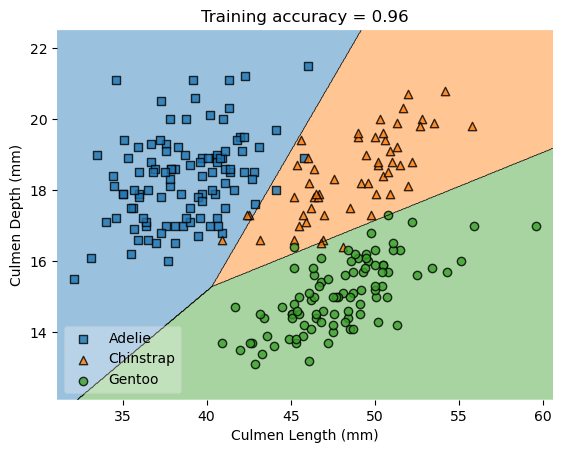

In [31]:
training_decision_regions(LogisticRegression, cols)

If we fit an individual logistic regression model, we'll be able to see how its predictions work: 

In [32]:
LR = LogisticRegression()
LR.fit(X_train[cols], y_train)

LogisticRegression()

Now that we've fit the model, we can inspect the *weight matrix*: 

This weight matrix multiplies the feature matrix to get the prediction matrix $\hat{\mY}$. 

The built-in method `LR.predict_proba` will compute the predictions after having passed them through the softmax function. The advantage of this is that we can interpret each entry as the probability of class membership: 

In [36]:
P_hat = LR.predict_proba(X_train[cols])
P_hat[0,:]

array([4.32383911e-06, 5.37250378e-03, 9.94623172e-01])

In [35]:
y_train[0]

2

Here's a heatmap of the first 20 individuals and their predicted labels. Brighter yellow means greater predicted probability of belonging to the specified class. 

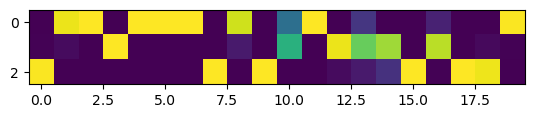

In [37]:
p = plt.imshow(P[0:20, :].T)

Almost all of the individuals are clearly predicted in just one of the classes, while the model is less confident about the membership of the penguin with index 10.  

## Support Vector Machine

The support vector machine classification problem *for binary classification* is a convex linear model in which we use the so-called hinge loss. In the notation from our previous lectures, it can be written like this: 

$$
\hat{\vw} = \argmin_{\vw} \left[\sum_{i = 1}^n \max \{1 - y_i \bracket{\vw, \vx_i}, 0\} + \frac{1}{2C}\sum_{\ell = 1}^p w_\ell^2\right]\;. 
$$

Mathematically, the support vector machine is an exceptionally beautiful algorithm, primarily because it admits a "*kernel trick*." The kernel trick allows us to use *infinite-dimensional* nonlinear features for prediction, which can significantly enhance the expressive power of our models. [For more on the kernel trick, see [Hardt and Recht](https://via.hypothes.is/https://arxiv.org/pdf/2102.05242.pdf), p. 58-62.]{.aside} To my knowledge, unfortunately, the support vector machine doesn't handle multiclass classification very well. What `scikit-learn` does is split the problem into a sequence of binary problems ("blue or not blue") to obtain the final result. Here's an example: 

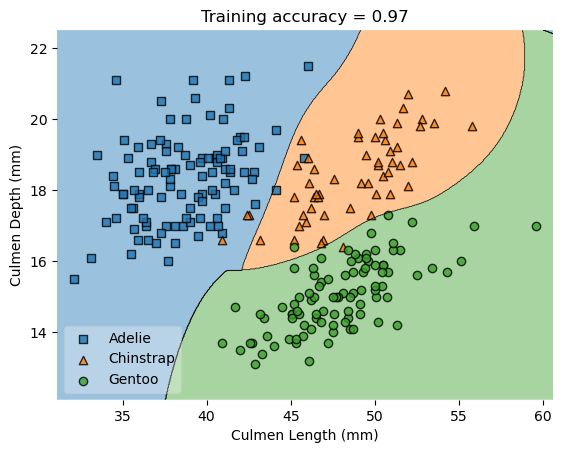

In [38]:
from sklearn.svm import SVC
training_decision_regions(SVC, cols, kernel = "rbf", gamma = 0.1)

Here, the `rbf` kernel can be changed according to user preferences. `gamma` controls how wiggly the decision boundary is allowed to be: 

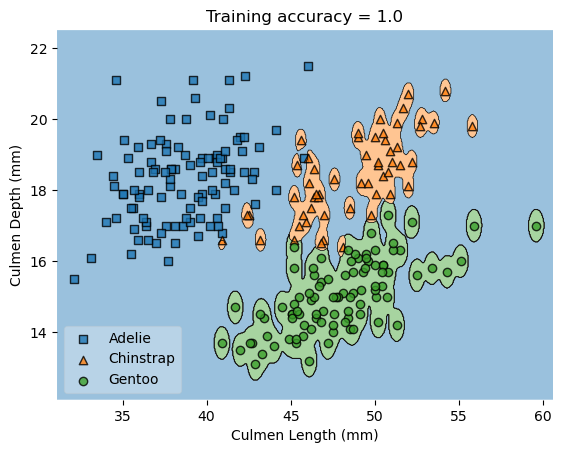

In [39]:
training_decision_regions(SVC, cols, kernel = "rbf", gamma = 10)

Cross-validation or other tools should be used in order to determine a value of $\gamma$ that has good expressive power while avoiding overfitting. 

## Multilayer Perceptron

Logistic regression and support vector machine are both *still* in the convex linear model framework. Let's now move beyond this framework for the first time. We'll consider

1. A new nonconvex linear model. 
2. A nonconvex nonlinear model. 

We've already seen a nonconvex linear model: perceptron! To create a more useful one, let's consider the following idea: we're going to just stack logistic regressions on top of each other, like this: 
$$
\mZ = \vsigma(\mX\mW)
$$

That is, the matrix $\mZ$ is the result of computing the matrix product $\mX\mW$ and then applying the softmax function row-wise. If $\mW$ is $p\times \ell$, then $\mX \mW$ is an $n\times \ell$ matrix, as is $\mZ$. This is essentially multinomial logistic regression. Now, here's the thing: what if we just used $\mZ$ as the input to *another* logistic regression? That is, we compute 
$$
\hat{\mY} = \vsigma(\mZ \mW')\;,
$$

where $\mW'$ is a *new* matrix of weights and $\hat{\mY}$ is our matrix of predictions that we will assess using the categorical cross-entropy or another such function. Then, the empirical risk minimization problem is
$$
\hat{\mW}, \hat{\mW}' = \argmin_{\mW, \mW'} \sum_{i = 1}^n \ell(\vsigma(\vsigma(\mX\mW)\mW')_i, \tilde{\vy}_i) \;.
$$

This problem is no longer convex, but we can still try to optimize it with gradient descent. 

We often call the computation of $\mZ$ a *hidden layer* because it is neither the feature matrix $\mX$ nor the target $\tilde{\vy}$. So, we have created a model with a single hidden layer. The idea of stacking together simple linear transformations with simple nonlinearities is the fundamental idea of modern deep learning. 

`scikit-learn` implements models like this under the heading of "multilayer perceptron" (the name is mostly historical). We can create a multilayer perceptron like this: 

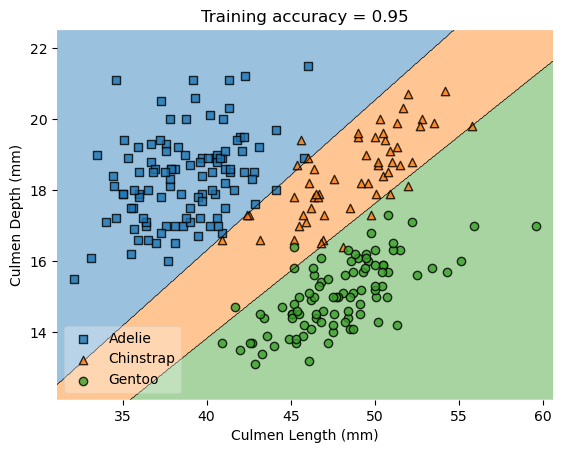

In [40]:
from sklearn.neural_network import MLPClassifier
training_decision_regions(MLPClassifier, cols, activation = "logistic", hidden_layer_sizes = (100, 100))

We observe apparently linear decision boundaries in the data set this time, although in principle the model could also have generated nonlinear boundaries. 

## Decision Tree Classifiers

Decision tree classifiers still do empirical risk minimization, but they are *both* nonlinear and nonconvex. The best way to see what a decision tree classifier does is to train one and visualize it: 

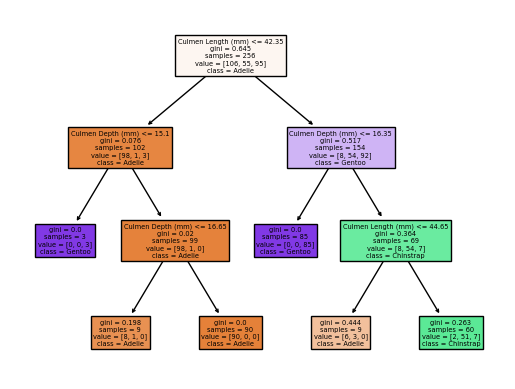

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
DTC = DecisionTreeClassifier(max_depth = 3)
DTC.fit(X_train[cols], y_train)

p = plot_tree(DTC, feature_names = cols, filled = True, class_names = species)

We observe that the decision tree works by making a sequence of decisions that sort the data into progressively finer buckets. You can implement a decision tree as nothing more than a sequence of nested `if-else` statements, although the algorithms to actually train them can be trickier. The decision regions for decision trees look "boxy," composed of vertical and horizontal segments: 

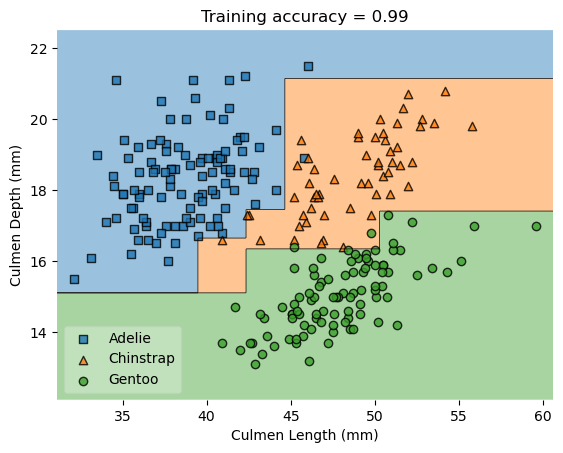

In [47]:
training_decision_regions(DecisionTreeClassifier, cols, max_depth = 5)

Decision trees are very flexible models, but it is easy for them to overfit if the depth is too high: 

For this reason, it is common to choose the depth through cross validation: 

It looks like a depth of roughly 6 might be about right for this data set: 

### Random Forest

A  *random forest* is essentially a collection of many decision trees that have been trained on random subsets of the data. Random forest classifiers have some very good properties that help them be fairly resistent to overfitting -- they usually work pretty well "out of the box." 

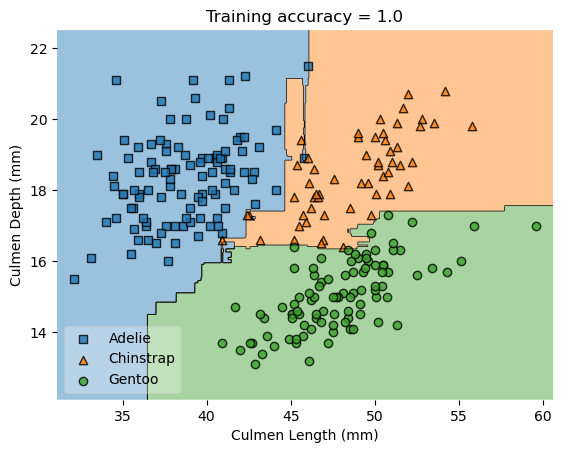

In [48]:
from sklearn.ensemble import RandomForestClassifier
training_decision_regions(RandomForestClassifier, cols)

# A Wide World of Classifiers

There are many other classification algorithms. Which algorithm to use in a specific case depends on things like: 

1. How much computational power do I have for the training stage?
2. How much computational power do I have each time I make a prediction?
3. Is the mathematical structure of the classifier well-aligned to my data? 

For relatively small data sets, it's often possible to simply use cross-validation scores or similar metrics in order to choose between competing classifiers. 
